In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

60000개의 이미지가 있고, <br>
한 이미지가 28x28개의 pixels로 구성되어 있다. 

In [4]:
train_images[0] # 첫번째 이미지, 255에 가까울수록 흰색을 의미

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
import matplotlib.pyplot as plt

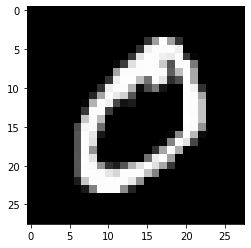

In [6]:
plt.imshow(train_images[1], cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

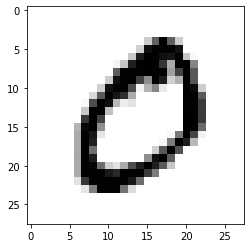

In [7]:
plt.imshow(train_images[1], cmap='gray_r') # cmap='gray', vmin=0, vmax=255
plt.show()

In [8]:
train_labels[1]

0

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
model = models.Sequential()

 neural network의 layer를 담을 수 있는 틀을 생성

In [11]:
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))

Hiddenlayer 생성 <br>
512개의 노드로 구성 <br>
relu를 활성화 함수로 사용 <br>
28x28개의 input을 받음

In [12]:
model.add(layers.Dense(10, activation = 'softmax'))

Output layer 생성 <br>
10개의 노드로 구성 ( = 종속변수가 취할 수 있는 값의 갯수) <br>
softmax 활성화함수 사용

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


weight값을 업데이트하는데 사용되는 방법, 여기서는 rmsprop 방법 사용 <br>
비용함수는 categorical_crossentropy 사용

In [14]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [15]:
train_images.shape

(60000, 784)

input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경

In [16]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Input scaling

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [18]:
test_labels.shape

(10000,)

원래의 종속변수를 담고 있는 array는 벡터, 즉 각 원소가 한개 이미지의 종속변수 값 (0 ~ 9) 을 취함

In [19]:
test_labels[0] 

7

test 데이터에 있는 첫번째 이미지의 종속변수 값은 7 <br>
이를 one-hot vector로 변경

In [20]:
test_labels_one_hot.shape

(10000, 10)

In [21]:
test_labels_one_hot[0] # one-hot vector (7번째 값만이 1)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [22]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [23]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# metrics => 모형의 성능을 무엇으로 평가할 것인지에 대한 것
# 'accuracy' => 전체의 관측치 중에서 몇 개 관측치의 종속변수 값을 제대로 맞혔는지를 의미

In [24]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2592 - accuracy: 0.9246
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1048 - accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0682 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0127 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0101 - accuracy: 0.9972

fit() 함수를 통해서 학습 <br>
epochs => 전체의 학습 데이터를 몇번 사용해서 학습 할 것인지에 대한 것 <br>
epochs = 5 라는 것은 5번 사용한다는 것을 의미 <br>
batch_size 는 경사하강법에서 한번에 몇개의 data points를 사용해서 weight를 업데이트 할 것인지에 대한 것 <br>
batch_size=128 는 한번에 128개의 이미지를 사용해서 weight를 업데이트 한다는 것을 의미

In [26]:
model.save('model1.h5')

In [26]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9815


[0.07240474969148636, 0.9815000295639038]

## 예측하기

In [29]:
model.predict(test_images[0:1])

array([[0.          , 0.          , 0.0000000231, 0.0000023265,
        0.          , 0.0000000001, 0.          , 0.9999976   ,
        0.          , 0.0000000217]], dtype=float32)

In [31]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(test_images[0:1])

array([[0.          , 0.          , 0.0000000231, 0.0000023265,
        0.          , 0.0000000001, 0.          , 0.9999976   ,
        0.          , 0.0000000217]], dtype=float32)

In [33]:
test_labels[0]

7

In [36]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels[np.argmax(model.predict(test_images[0:1]))]

7

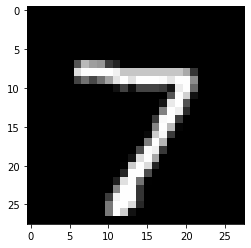

In [34]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.show()

## Confusion matrix 확인하기

In [39]:
y_preds_prob = model.predict(test_images)

In [40]:
y_preds_prob.shape

(10000, 10)

In [41]:
y_preds = np.argmax(y_preds_prob, axis=1)

In [45]:
y_preds.shape

(10000,)

In [46]:
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
confusion_matrix(test_labels, y_preds)

array([[ 974,    0,    0,    1,    0,    1,    1,    1,    2,    0],
       [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
       [   3,    1, 1014,    1,    3,    0,    2,    3,    5,    0],
       [   0,    0,    6,  991,    0,    4,    0,    3,    1,    5],
       [   0,    0,    3,    1,  965,    0,    3,    2,    0,    8],
       [   2,    0,    0,    6,    1,  877,    2,    0,    2,    2],
       [   9,    3,    1,    1,    3,    8,  932,    0,    1,    0],
       [   1,    4,    8,    0,    1,    0,    0, 1006,    3,    5],
       [   7,    1,    6,    3,    4,    6,    0,    2,  940,    5],
       [   2,    2,    0,    6,    7,    3,    0,    2,    1,  986]],
      dtype=int64)

In [50]:
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 비용함수값 확인하기
- 과적합 문제는 주로 accuracy 값보다는 비용함수 값의 추세를 보고 판단함

In [35]:
import matplotlib.pyplot as plt

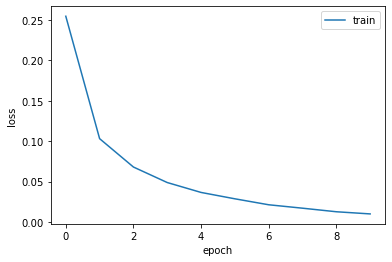

In [36]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# Accuracy 확인하기

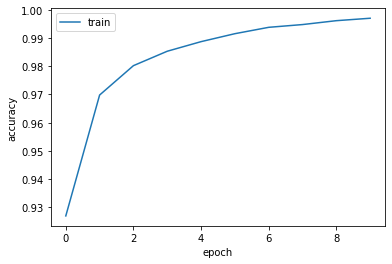

In [37]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

## Extended model

In [33]:
model_ext = models.Sequential()
model_ext.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model_ext.add(layers.Dense(128, activation = 'relu'))
model_ext.add(layers.Dense(10, activation = 'softmax'))

In [34]:
model_ext.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = optimizers.RMSprop(lr=0.001)
model_ext.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
model_ext.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2324 - accuracy: 0.9298
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0881 - accuracy: 0.9732
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0587 - accuracy: 0.9816
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0227 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0138 - accuracy: 0.9955 0s - loss:
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0105

In [30]:
model_ext.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9817


[0.08893968164920807, 0.9817000031471252]